In [51]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import zipfile
import re
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

In [52]:
zf = zipfile.ZipFile('Data/Data_incidents.csv.zip') 
data = pd.read_csv('Data/Data_incidents.csv.zip').reset_index()

## Extract mass shooting incidents

In [53]:
data = data.drop(columns=['index','Unnamed: 0'])

In [54]:
mass_shootings = data[data['Mass Shooting']==True]

In [9]:
len(mass_shootings)

1352

## Incidents over time

In [5]:
ms_time = mass_shootings.groupby('Date')['incident_id'].nunique()
ms_time

Date
2014-01-01    1
2014-01-03    1
2014-01-12    3
2014-01-13    1
2014-01-14    1
             ..
2018-03-17    2
2018-03-21    1
2018-03-24    1
2018-03-29    2
2018-03-31    1
Name: incident_id, Length: 808, dtype: int64

In [6]:
ms_time = ms_time.to_frame()
ms_time.reset_index(level=0, inplace=True)

In [7]:
ms_time

,Date,incident_id
0,2014-01-01,1
1,2014-01-03,1
2,2014-01-12,3
3,2014-01-13,1
4,2014-01-14,1
...,...,...
803,2018-03-17,2
804,2018-03-21,1
805,2018-03-24,1
806,2018-03-29,2


In [8]:
#check sum
ms_time['incident_id'].sum()

1363

In [9]:
# format date
ms_time['date'] = pd.to_datetime(ms_time.Date.str.strip(), format = '%Y-%m-%d')#
ms_time=ms_time.drop(columns = 'Date');

In [10]:
ms_time

,incident_id,date
0,1,2014-01-01
1,1,2014-01-03
2,3,2014-01-12
3,1,2014-01-13
4,1,2014-01-14
...,...,...
803,2,2018-03-17
804,1,2018-03-21
805,1,2018-03-24
806,2,2018-03-29


In [11]:
# Create new date columns
ms_time['Year'] = ms_time.date.apply(lambda x: x.year)
ms_time['Month'] = ms_time.date.apply(lambda x: x.month)
ms_time['Year_Month'] = ms_time.date.apply(lambda x: 100*x.year + x.month)

In [12]:
ms_time.head(2)

,incident_id,date,Year,Month,Year_Month
0,1,2014-01-01,2014,1,201401
1,1,2014-01-03,2014,1,201401


In [13]:
#ms_year = ms_time.groupby('Year').incident_id.sum()
ms_year_month = ms_time.groupby('Year_Month').incident_id.sum()

In [14]:
ms_year_month = ms_year_month.to_frame()
ms_year_month.reset_index(level=0, inplace=True)
ms_year_month.columns = ['Year_Month', 'ms_all']

In [15]:
inc_all = data.Date
inc_all = inc_all.to_frame()
inc_all['counts'] = 1

In [16]:
inc_all['date'] = pd.to_datetime(inc_all.Date.str.strip(), format = '%Y-%m-%d')#
inc_all= inc_all.drop(['Date'], axis=1);

In [17]:
inc_all['Year'] = inc_all.date.apply(lambda x: x.year)
inc_all['Year_Month'] = inc_all.date.apply(lambda x: 100*x.year + x.month)

In [18]:
all_YM = inc_all.groupby('Year_Month').counts.sum()

In [19]:
all_YM_pd = all_YM.to_frame()
all_YM_pd.reset_index(level=0, inplace=True)
all_YM_pd.columns = ['Year_Month', 'inc_all']

In [20]:
YM = pd.merge(all_YM_pd, ms_year_month, on='Year_Month')

In [21]:
len(YM)
YM.ms_all.sum()

1363

In [22]:
mass_shootings['victims'] = mass_shootings.n_killed + mass_shootings.n_injured


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
max_vic = mass_shootings.victims.max()
mass_shootings[mass_shootings['victims']==max_vic]

,incident_id,state,city_or_county,n_killed,n_injured,incident_characteristics,latitude,location_description,longitude,participant_age,...,Child injured,Gun buy back action,Terrorism Involvement,Officer Involved Shooting - Accidental discharge - no injury required,Mistaken ID,Officer Involved Shooting - subject/suspect/perpetrator suicide by cop,Ghost gun,Political Violence,NAV,victims
127677,577157,Florida,Orlando,50,53,"Shot - Wounded/Injured||Shot - Dead (murder, a...",28.5195,Pulse,-81.3767,0::34||1::23||2::20||3::22||4::36||5::22||6::2...,...,False,False,True,False,False,False,False,False,False,103


In [51]:
mass_shootings.groupby('victims')['incident_id'].nunique()

victims
4      759
5      337
6      111
7       71
8       33
9       16
10       7
11       3
12       7
13       1
14       1
15       3
16       1
17       2
18       2
19       1
20       1
21       1
25       1
27       1
34       1
35       1
47       1
103      1
Name: incident_id, dtype: int64

## Days between Mass Shootings

In [229]:
ms_dates = mass_shootings[['Date','state','n_killed','n_injured']].reset_index()
#ms_dates = pd.DataFrame(ms_dates).reset_index()
ms_dates=ms_dates.drop(columns = 'index')

In [230]:
# format date
ms_dates['date'] = pd.to_datetime(ms_dates.Date.str.strip(), format = '%Y-%m-%d')#
ms_dates=ms_dates.drop(columns = 'Date');

In [279]:
#northeast = ['Illinois','Wisconsin','Michigan','Indiana']
#ms_northeast= ms_dates.loc[ms_dates['state'].isin(northeast)].reset_index()
#ms_northeast=ms_northeast.drop(columns = 'index')

#middleatlantic = ['New York','Pensylvania','New Jersey']
#ms_midatlantic= ms_dates.loc[ms_dates['state'].isin(middleatlantic)].reset_index()
#ms_midatlantic=ms_midatlantic.drop(columns = 'index')

ms_newjersey = ms_dates[ms_dates['state']== 'New Jersey'].reset_index()
ms_newjersey=ms_newjersey.drop(columns = 'index')

ms_cali = ms_dates[ms_dates['state']== 'California'].reset_index()
ms_cali=ms_cali.drop(columns = 'index')

ms_illinois = ms_dates[ms_dates['state']== 'Illinois'].reset_index()
ms_illinois=ms_illinois.drop(columns = 'index')


In [232]:
days = [0]

for i in range(len(ms_dates)-1):
    first = ms_dates.date[i]
    second = ms_dates.date[i+1]
    day = (second-first).days
    days.append(day)
    

In [233]:
ms_dates['days_btw'] = pd.DataFrame(days, index=ms_dates.index)

In [234]:
days_ne = [0]

for i in range(len(ms_northeast)-1):
    first = ms_northeast.date[i]
    second = ms_northeast.date[i+1]
    day = (second-first).days
    days_ne.append(day)
    

In [235]:
ms_northeast['days_btw'] = pd.DataFrame(days_ne, index=ms_northeast.index)

In [236]:
days_ca = [0]

for i in range(len(ms_cali)-1):
    first = ms_cali.date[i]
    second = ms_cali.date[i+1]
    day = (second-first).days
    days_ca.append(day)
    

In [237]:
ms_cali['days_btw'] = pd.DataFrame(days_ca, index=ms_cali.index)

In [272]:
days_ma = [0]

for i in range(len(ms_midatlantic)-1):
    first = ms_midatlantic.date[i]
    second = ms_midatlantic.date[i+1]
    day = (second-first).days
    days_ma.append(day)
    

In [273]:
ms_midatlantic['days_btw'] = pd.DataFrame(days_ma, index=ms_midatlantic.index)

In [276]:
days_il = [0]

for i in range(len(ms_illinois)-1):
    first = ms_illinois.date[i]
    second = ms_illinois.date[i+1]
    day = (second-first).days
    days_il.append(day)
    

In [277]:
ms_illinois['days_btw'] = pd.DataFrame(days_il, index=ms_illinois.index)

In [280]:
days_nj = [0]

for i in range(len(ms_newjersey)-1):
    first = ms_newjersey.date[i]
    second = ms_newjersey.date[i+1]
    day = (second-first).days
    days_nj.append(day)

In [281]:
ms_newjersey['days_btw'] = pd.DataFrame(days_nj, index=ms_newjersey.index)

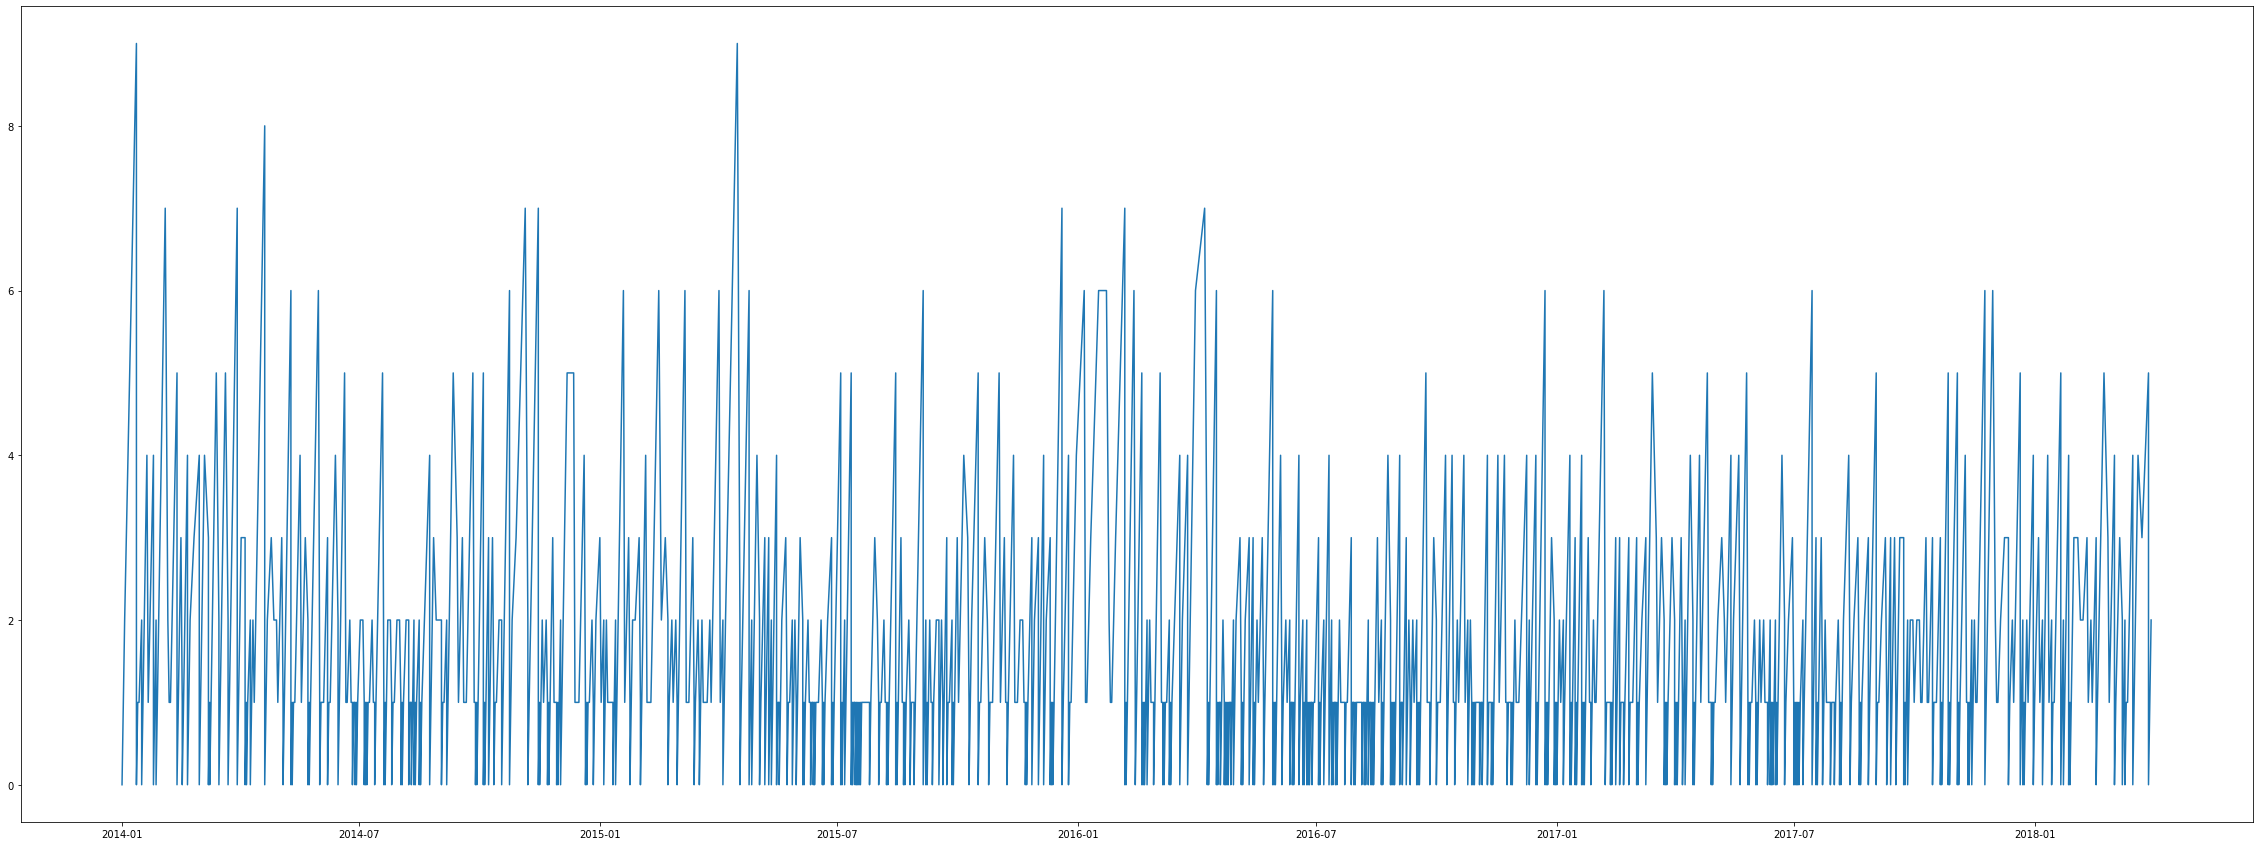

In [238]:
fig, ax = plt.subplots(figsize=(40,15))
plt.plot(ms_dates.date,ms_dates.days_btw)

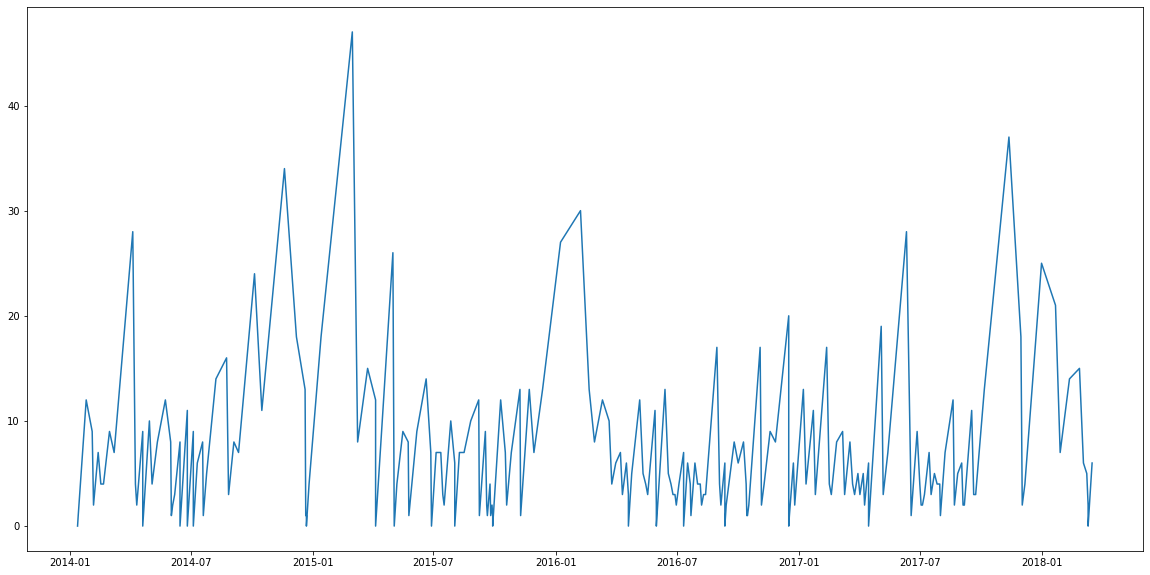

In [239]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(ms_northeast.date,ms_northeast.days_btw)

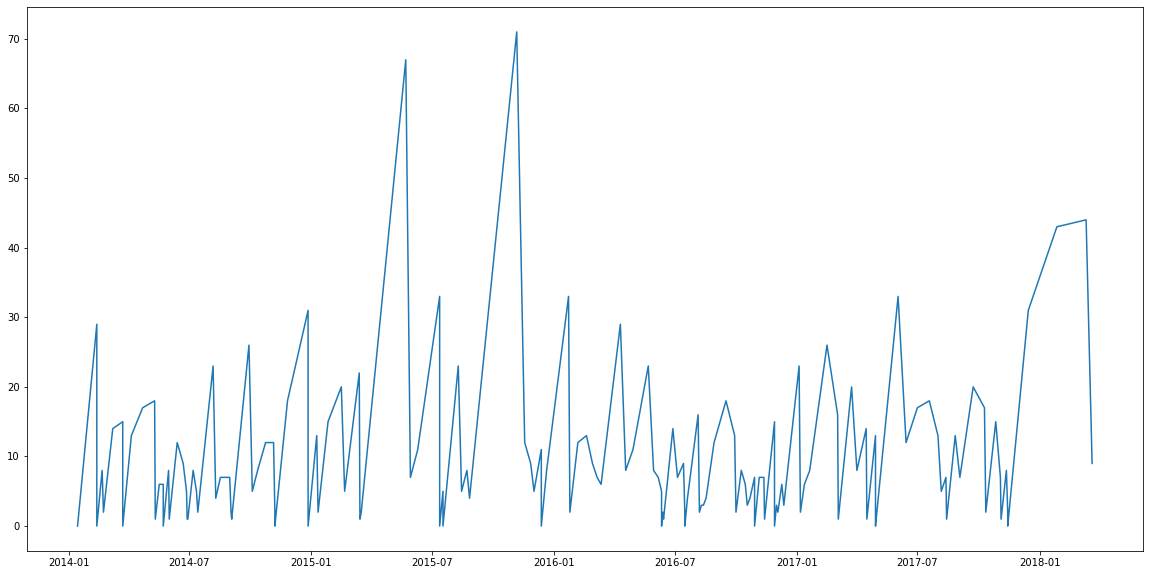

In [240]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(ms_cali.date,ms_cali.days_btw)

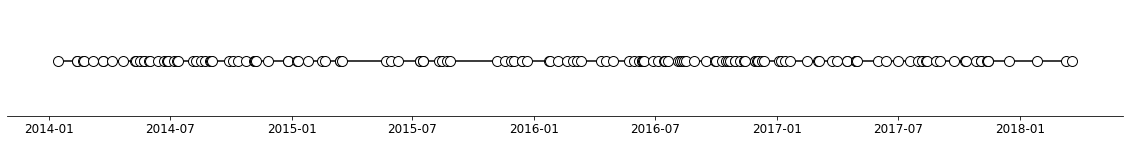

In [270]:
# Choose some nice levels
levels_cali = np.tile([-1, 1, -1, 1, -1, 1],
                 int(np.ceil(len(ms_cali.date)/6)))[:len(ms_cali.date)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20, 2)) #constrained_layout=True)


markerline, stemline, baseline = ax.stem(ms_cali.date, levels_cali,
                                         linefmt="white", basefmt="k-",
                                         use_line_collection=True)



plt.setp(markerline, mec="k", mfc="w", zorder=3,markersize=10)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(ms_cali.date)))

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

#caliax.margins(y=0.1)
plt.xticks(fontsize=12)
plt.ylim(bottom=-0.25)
plt.ylim(top=0.25)


plt.show()

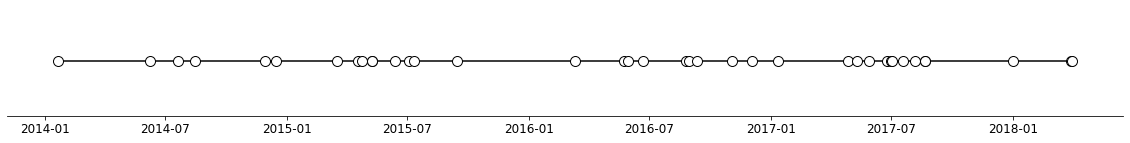

In [283]:
levels_nj = np.tile([-1, 1, -1, 1, -1, 1],
                 int(np.ceil(len(ms_newjersey.date)/6)))[:len(ms_newjersey.date)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20, 2)) #constrained_layout=True)

markerline, stemline, baseline = ax.stem(ms_newjersey.date, levels_nj,
                                         linefmt="white", basefmt="k-",
                                         use_line_collection=True)



plt.setp(markerline, mec="k", mfc="w", zorder=3,markersize=10)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(ms_newjersey.date)))

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

#caliax.margins(y=0.1)
plt.xticks(fontsize=12)
plt.ylim(bottom=-0.25)
plt.ylim(top=0.25)


plt.show()

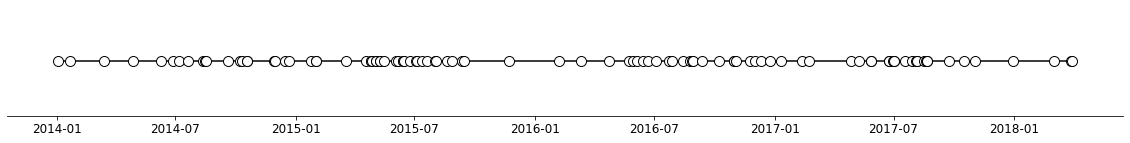

In [274]:
levels_ma = np.tile([-1, 1, -1, 1, -1, 1],
                 int(np.ceil(len(ms_midatlantic.date)/6)))[:len(ms_midatlantic.date)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20, 2)) #constrained_layout=True)

markerline, stemline, baseline = ax.stem(ms_midatlantic.date, levels_ma,
                                         linefmt="white", basefmt="k-",
                                         use_line_collection=True)



plt.setp(markerline, mec="k", mfc="w", zorder=3,markersize=10)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(ms_midatlantic.date)))

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

#caliax.margins(y=0.1)
plt.xticks(fontsize=12)
plt.ylim(bottom=-0.25)
plt.ylim(top=0.25)


plt.show()

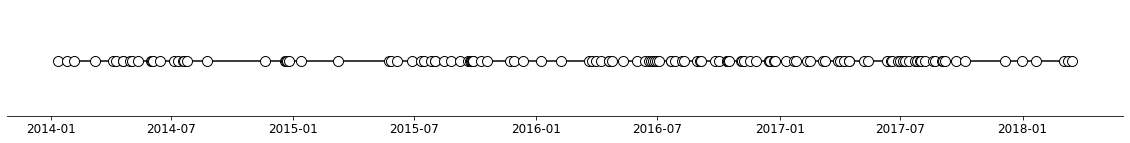

In [278]:
levels_il = np.tile([-1, 1, -1, 1, -1, 1],
                 int(np.ceil(len(ms_illinois.date)/6)))[:len(ms_illinois.date)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20, 2)) #constrained_layout=True)

markerline, stemline, baseline = ax.stem(ms_illinois.date, levels_il,
                                         linefmt="white", basefmt="k-",
                                         use_line_collection=True)



plt.setp(markerline, mec="k", mfc="w", zorder=3,markersize=10)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(ms_illinois.date)))

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

#caliax.margins(y=0.1)
plt.xticks(fontsize=12)
plt.ylim(bottom=-0.25)
plt.ylim(top=0.25)


plt.show()

### Removing conventional crimes

In [80]:
ms_noncon = mass_shootings[mass_shootings['Gang involvement'] == False]
ms_noncon = ms_noncon[ms_noncon['Armed robbery with injury/death and/or evidence of DGU found'] == False]
ms_noncon = ms_noncon['Date']
ms_noncon = pd.DataFrame(ms_noncon).reset_index()
ms_noncon=ms_noncon.drop(columns = 'index')

In [81]:
# format date
ms_noncon['date'] = pd.to_datetime(ms_noncon.Date.str.strip(), format = '%Y-%m-%d')#
ms_noncon=ms_noncon.drop(columns = 'Date');

In [83]:
days_con = [0]

for i in range(len(ms_noncon)-1):
    first = ms_noncon.date[i]
    second = ms_noncon.date[i+1]
    day = (second-first).days
    days_con.append(day)
    

In [85]:
ms_noncon['days_btw'] = pd.DataFrame(days_con, index=ms_noncon.index)

In [86]:
ms_noncon

,date,days_btw
0,2014-01-01,0
1,2014-01-03,2
2,2014-01-12,9
3,2014-01-12,0
4,2014-01-12,0
...,...,...
1162,2018-03-17,0
1163,2018-03-21,4
1164,2018-03-29,8
1165,2018-03-29,0


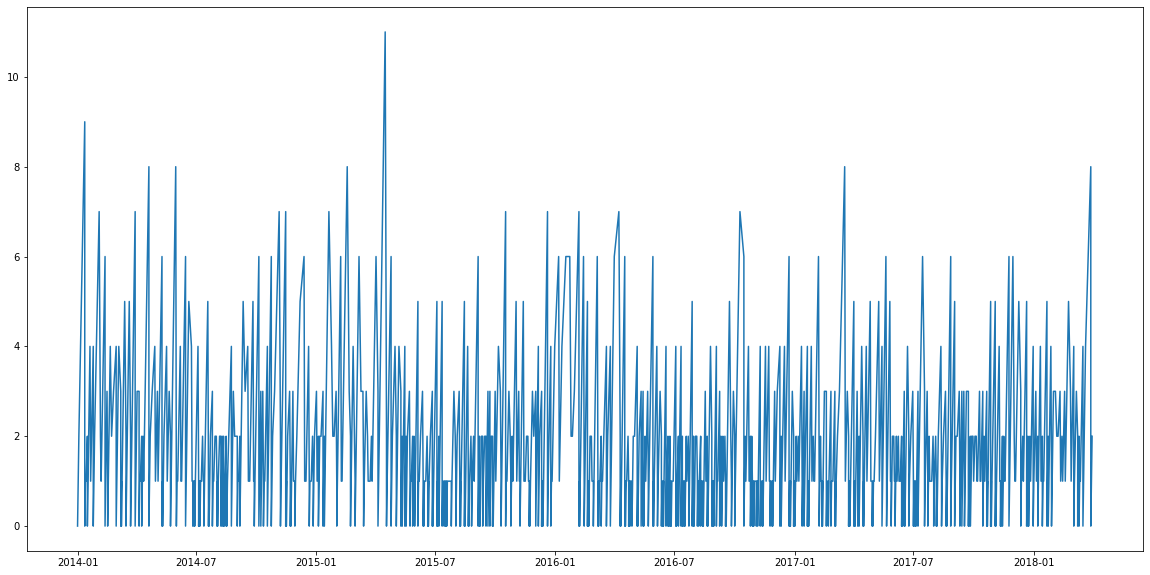

In [87]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(ms_noncon.date,ms_noncon.days_btw)

## TABLE OF CHARACTERISTICS

In [52]:
df_incidents = mass_shootings.iloc[:, list(range(18,128))]
incidents = []

for col in df_incidents.columns: 
    incidents.append(col)

In [40]:
dataframes_gender = []

for row in mass_shootings['participant_gender'].fillna("0:,")[:len(mass_shootings)]:
    participants = np.array([re.split(r'::?', p) for p in re.split(r'\|\|?', row)]).T
    #print('participants: ', participants)

    data = dict(zip(*participants))
    #print('data: ', data)

    dataframe = pd.Series(data).to_frame().T
    #display(dataframe)

    dataframes_gender.append(dataframe)

gender = pd.concat(dataframes_gender).reset_index().drop('index', 1).fillna('')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [42]:
dataframes_age = []

for row in mass_shootings['participant_age'].fillna("0:,")[:len(mass_shootings)]:
    participants = np.array([re.split(r'::?', p) for p in re.split(r'\|\|?', row)]).T
    #print('participants: ', participants)

    data = dict(zip(*participants))
    #print('data: ', data)

    dataframe = pd.Series(data).to_frame().T
    #display(dataframe)

    dataframes_age.append(dataframe)

age = pd.concat(dataframes_age).reset_index().drop('index', 1).fillna('')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [43]:
dataframes_status = []

for row in mass_shootings['participant_status'].fillna("0:,")[:len(mass_shootings)]:
    participants = np.array([re.split(r'::?', p) for p in re.split(r'\|\|?', row)]).T
    #print('participants: ', participants)

    data = dict(zip(*participants))
    #print('data: ', data)

    dataframe = pd.Series(data).to_frame().T
    #display(dataframe)

    dataframes_status.append(dataframe)

status = pd.concat(dataframes_status).reset_index().drop('index', 1).fillna('')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [44]:
dataframes_type = []

for row in mass_shootings['participant_type'].fillna("0:,")[:len(mass_shootings)]:
    participants = np.array([re.split(r'::?', p) for p in re.split(r'\|\|?', row)]).T
    #print('participants: ', participants)

    data = dict(zip(*participants))
    #print('data: ', data)

    dataframe = pd.Series(data).to_frame().T
    #display(dataframe)

    dataframes_type.append(dataframe)

_type = pd.concat(dataframes_type).reset_index().drop('index', 1).fillna('')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


### Gender of victimes and suspects

In [55]:
combined_gender = gender.astype(str).add(',').add(_type.astype(str)) #.add(', ').add(status.astype(str))
com = combined_gender.fillna(',')

com['Male, Victim'] = com.apply(lambda row: sum(row[0:103]=='Male,Victim') ,axis=1)
com['Female, Victim'] = com.apply(lambda row: sum(row[0:103]=='Female,Victim') ,axis=1)
com['Male, Suspect'] = com.apply(lambda row: sum(row[0:103]=='Male,Subject-Suspect') ,axis=1)
com['Female, Suspect'] = com.apply(lambda row: sum(row[0:103]=='Female,Subject-Suspect') ,axis=1)
com['Victim1'] = com.apply(lambda row: sum(row[0:103]==',Victim') ,axis=1)
com['Victim2'] = com.apply(lambda row: sum(row[0:103]==',,Victim') ,axis=1)
com['Subject'] = com.apply(lambda row: sum(row[0:103]==',Subject-Suspect') ,axis=1)

com[['Male, Victim','Female, Victim','Male, Suspect','Female, Suspect','Victim1','Victim2','Subject']].sum()

Male, Victim       3863
Female, Victim     1484
Male, Suspect      1086
Female, Suspect      33
Victim1            1386
Victim2             109
Subject             107
dtype: int64

### Status of victimes and suspects

In [56]:
combined_status = status.astype(str).add(',').add(_type.astype(str)) #.add(', ').add(status.astype(str))
com_s = combined_status.fillna(',')

com_s['Killed, Victim'] = com.apply(lambda row: sum(row[0:103]=='Killed,Victim') ,axis=1)
com_s['Injured, Victim'] = com.apply(lambda row: sum(row[0:103]=='Injured,Victim') ,axis=1)
com_s['Unharmed/Arrested, Victim'] = com.apply(lambda row: sum(row[0:103]=='Unharmed, Arrested,Victim') ,axis=1)
com_s['Killed, Suspect'] = com.apply(lambda row: sum(row[0:103]=='Killed,Subject-Suspect') ,axis=1)
com_s['Injured, Suspect'] = com.apply(lambda row: sum(row[0:103]=='Injured,Subject-Suspect') ,axis=1)
com_s['Unharmed/Arrested, Suspect'] = com.apply(lambda row: sum(row[0:103]=='Unharmed, Arrested,Subject-Suspect') ,axis=1)

com_s[['Killed, Victim', 'Injured, Victim','Unharmed/Arrested, Victim','Killed, Suspect','Injured, Suspect','Unharmed/Arrested, Suspect']].sum()

Killed, Victim                0
Injured, Victim               0
Unharmed/Arrested, Victim     0
Killed, Suspect               0
Injured, Suspect              0
Unharmed/Arrested, Suspect    0
dtype: int64

## Combined gender and status

In [66]:
combined_gender_status = gender.astype(str).add(',').add(status.astype(str)) #.add(', ').add(status.astype(str))
com_gs = combined_gender_status.fillna(',')

com_gs['Male, Killed'] = com_gs.apply(lambda row: sum(row[0:103]=='Male,Killed') ,axis=1)
com_gs['Female, Killed'] = com_gs.apply(lambda row: sum(row[0:103]=='Female,Killed') ,axis=1)
com_gs['Male, Injured'] = com_gs.apply(lambda row: sum(row[0:103]=='Male,Injured') ,axis=1)
com_gs['Female, Injured'] = com_gs.apply(lambda row: sum(row[0:103]=='Female,Injured') ,axis=1)
#com_gs['Victim1'] = com_gs.apply(lambda row: sum(row[0:103]==',Victim') ,axis=1)
#com_gs['Victim2'] = com_gs.apply(lambda row: sum(row[0:103]==',,Victim') ,axis=1)
#com_gs['Subject'] = com_gs.apply(lambda row: sum(row[0:103]==',Subject-Suspect') ,axis=1)

com_gs[['Male, Killed','Female, Killed','Male, Injured','Female, Injured']].sum()

Male, Killed       1089
Female, Killed      417
Male, Injured      2850
Female, Injured    1062
dtype: int64

In [59]:
com_s.loc[2]

0                                                 Injured,Victim
1                                                 Injured,Victim
10                            Unharmed, Arrested,Subject-Suspect
100                                                            ,
101                                                            ,
                                             ...                
Injured, Victim                                                0
Unharmed/Arrested, Victim                                      0
Killed, Suspect                                                0
Injured, Suspect                                               0
Unharmed/Arrested, Suspect                                     0
Name: 2, Length: 109, dtype: object

In [68]:
##SKAL GENNEMSKUES!

#stacked = combined.stack()
#stacked_df = pd.DataFrame(stacked)
#combinations = stacked_df.reset_index()
#stacked.unique()

In [61]:
def separate(df):
    df=df.split("||")
    df=[(x.split("::")) for x in df]
    y = []
    for  i in range (0, len(df)):
        y.append(df[i][-1])
    return(y) 

In [62]:
# Counting males and females 
mass_shootings['participant_gender'] = mass_shootings['participant_gender'].fillna("0::Zero")
mass_shootings['gender'] = mass_shootings['participant_gender'].apply(lambda x: separate(x))
mass_shootings['Males'] = mass_shootings['gender'].apply(lambda x: x.count('Male'))
mass_shootings['Females'] = mass_shootings['gender'].apply(lambda x: x.count('Female'))

# Counting victims and subjects    
mass_shootings['participant_type'] = mass_shootings['participant_type'].fillna("0::Zero")
mass_shootings['type'] = mass_shootings['participant_type'].apply(lambda x: separate(x))
mass_shootings['Victims'] = mass_shootings['type'].apply(lambda x: x.count('Victim'))
mass_shootings['Subject'] = mass_shootings['type'].apply(lambda x: x.count('Subject-Suspect'))

In [63]:
print(mass_shootings['Victims'].sum())
print(mass_shootings['Subject'].sum())

6793
1210


In [64]:
char = pd.DataFrame(mass_shootings[incidents].sum())
char.columns = ['count']
char = char[char['count'] >= 50]

In [65]:
char.sort_values('count', ascending=False)

,count
victims,6968.0
Mass Shooting,1363.0
Shot - Wounded/Injured,1300.0
Shot - Dead,715.0
Bar/club incident - in or around establishment,230.0
Drive-by,216.0
Gang involvement,160.0
Possession,138.0
Domestic Violence,93.0
Institution/Group/Business,89.0
